In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Data loading

sf_data = pd.read_csv('ProyectosCTCI.csv', sep = ';')
sf_data.head()

,Código,Agencia,subdireccion,Instrumento,Concurso,Año,Titulo,RegionEjecucion,Tipo,Objetivo,Institucion,SectorEconomico,AreaConocimiento,Monto,TipoBeneficiario
0,VIU21P0017,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,"CUBACTI, COMPLEJO A BASE DE COBRE, COMO TRATAM...",Región Metropolitana de Santiago,Subsidio,NaN,UNIVERSIDAD DE SANTIAGO DE CHILE,NaN,Ciencias Naturales,30000000.0,Persona Jurídica
1,VIU21P0051,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,PLATAFORMA TECNOLOGICA PARA LA EVALUACION Y VA...,Región de Antofagasta,Subsidio,NaN,UNIVERSIDAD DE ANTOFAGASTA,NaN,Ciencias Naturales,30000000.0,Persona Jurídica
2,VIU21P0060,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,BACTOMELANIN: PRODUCTO BASADO EN UN PIGMENTO B...,Región de La Araucanía,Subsidio,NaN,UNIVERSIDAD DE LA FRONTERA,NaN,Ciencias Naturales,30000000.0,Persona Jurídica
3,VIU21P0064,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,"""VALORIZACION DE MELAZA AZUCARERA MEDIANTE LA ...",Región de La Araucanía,Subsidio,NaN,UNIVERSIDAD DE LA FRONTERA,NaN,Ingeniería y Tecnología,30000000.0,Persona Jurídica
4,VIU21P0018,ANID,Investigación Aplicada e Innovación,VIU - Una Etapa,XI CONCURSO VALORIZACION DE LA INVESTIGACION E...,2021,DESARROLLO DE FORMULACIONES FUNGICIDAS BASADAS...,Región Metropolitana de Santiago,Subsidio,NaN,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,NaN,Ciencias Naturales,30000000.0,Persona Jurídica


In [3]:
# Preliminary Inspection

print(sf_data.dtypes)
print(sf_data.describe(include='all'))

Código               object
Agencia              object
subdireccion         object
Instrumento          object
Concurso             object
Año                   int64
Titulo               object
RegionEjecucion      object
Tipo                 object
Objetivo             object
Institucion          object
SectorEconomico      object
AreaConocimiento     object
Monto               float64
TipoBeneficiario     object
dtype: object
                 Código Agencia                subdireccion       Instrumento  \
count             47818   47818                       47818             47818   
unique            47481       3                           7               398   
top     SIN INFORMACION    ANID  Proyectos de Investigación  FONDECYT REGULAR   
freq                173   38263                       27654             17143   
mean                NaN     NaN                         NaN               NaN   
std                 NaN     NaN                         NaN               NaN   

In [4]:
# Inspect NaN values

sf_data.isnull().sum()

Código                  0
Agencia                 0
subdireccion            0
Instrumento             0
Concurso             8908
Año                     0
Titulo                  3
RegionEjecucion         0
Tipo                    0
Objetivo            38932
Institucion           249
SectorEconomico     38910
AreaConocimiento     8908
Monto                1540
TipoBeneficiario     8908
dtype: int64

In [5]:
# Get value counts for columns of interest - State agencies and sub-agencies

    # Agencia (Agency)

print(sf_data.Agencia.value_counts())

    # Subdirección (Sub-agencies)

print(sf_data.subdireccion.value_counts())

ANID                  38263
Corfo                  8908
Subsecretaría CTCI      647
Name: Agencia, dtype: int64
Proyectos de Investigación             27654
Innovación                              8908
REC                                     5049
Investigación Aplicada e Innovación     4058
Centros e Investigación Asociativa      1003
Ciencia y Sociedad                       647
No Aplica                                499
Name: subdireccion, dtype: int64


In [6]:
# Get value counts for columns of interest - Funding Instruments

    # Instrumento (Instrument)

print(sf_data.Instrumento.value_counts())

    # Concurso (Contests)

print(sf_data.Concurso.value_counts())

    # Año de Ejecución (Year of Execution)

print(sf_data.Año.value_counts())

    # Tipo de fondo (Type of Funding)
    
print(sf_data.Tipo.value_counts())

FONDECYT REGULAR                                                              17143
FONDECYT INICIACION                                                            4337
FONDECYT POSTDOCTORADO                                                         3858
INCENTIVO A LA COOPERACION INTERNACIONAL FONDECYT                              1570
Ley I+D                                                                        1025
                                                                              ...  
SISTEMA DE INFORMACION CIENTIFICA, TECNOLOGICA Y DE INNOVACION TECNOLOGICA        1
Programa de Proyectos de T.T.  - 1a fase - 2001                                   1
Línea del Apoyo al Extensionismo                                                  1
Redes De Inversionistas Ángeles                                                   1
INVESTIGACION CONJUNTA - RECURSOS MINEROS CONICYT-ACADEMIA DE FINLANDIA           1
Name: Instrumento, Length: 398, dtype: int64
REGULAR                        

In [7]:
# Get value counts for columns of interest - Awardees

    # Sector Económico (Economic Sector)

print(sf_data.SectorEconomico.value_counts())

    # Area de Conocimiento (Area of Knowledge)

print(sf_data.AreaConocimiento.value_counts())

    # Tipo de Beneficiario (Type of Awardee)
    
print(sf_data.TipoBeneficiario.value_counts())

    # Región (Region)

print(sf_data.RegionEjecucion.value_counts())

Multisectorial                                                                                 922
Agrícola (excepto cultivo de uvas)                                                             899
Minería y metalurgia extractiva                                                                807
Alimentos (excepto producción de vino y derivados)                                             775
Pesca y acuicultura                                                                            636
Salud y Farmacéutica (en humanos)                                                              629
Comercio y retail                                                                              523
Educación y servicios conexos                                                                  471
Construcción                                                                                   427
Turismo                                                                                        397
Energético

In [8]:
# Replace all occurences of "Región de Magallanes y de La Antártica Chilena" for "Región de Magallanes y de la Antártica Chilena "

sf_data['RegionEjecucion'] = sf_data['RegionEjecucion'].replace('Región de Magallanes y de La Antártica Chilena', 'Región de Magallanes y de la Antártica Chilena')

In [9]:
# Grouped table - State agencies and sub-agencies: Average amount granted by Agency and Sub-agency

aag_a_sa = sf_data[sf_data['subdireccion'] != 'No Aplica'].groupby(['Agencia', 'subdireccion']).Monto.mean()
aag_a_sa

Agencia             subdireccion                       
ANID                Centros e Investigación Asociativa     8.597148e+08
                    Investigación Aplicada e Innovación    1.145396e+08
                    Proyectos de Investigación             6.729778e+07
                    REC                                    4.022675e+07
Corfo               Innovación                             5.853113e+07
Subsecretaría CTCI  Ciencia y Sociedad                     4.584447e+07
Name: Monto, dtype: float64

In [10]:
# Grouped table - Funding instruments: Average amount granted by Instrument and Type of Contest

aag_i_c = sf_data.groupby(['Instrumento', 'Tipo']).Monto.mean()
aag_i_c

Instrumento                                                        Tipo    
2014/Gestion De La Innovacion                                      Subsidio    2.997992e+07
ACCION REGIONAL                                                    Subsidio    9.948286e+07
ALIMENTOS FUNCIONALES                                              Subsidio    1.661598e+08
AMSUD                                                              Subsidio    1.302437e+08
ANILLOS CYT                                                        Subsidio    4.500000e+08
                                                                                   ...     
VIU - Etapa 1                                                      Subsidio    2.000000e+06
VIU - Etapa 2                                                      Subsidio    2.400000e+07
VIU - Etapa 2 Bases 4091/2018 Octava Convocatoria RenovaciOn 2019  Subsidio    2.400000e+07
VIU - Una Etapa                                                    Subsidio    2.991396e+07
Vouc

In [11]:
# Grouped table - Funding instruments: Average amount granted by Year of Execution

aag_y = sf_data.groupby('Año').Monto.mean()
aag_y


Año
1982    3.925826e+05
1983    3.601197e+05
1984    3.719306e+05
1985    4.850038e+05
1986    1.922329e+06
1987    1.895788e+06
1988    7.142437e+06
1989    7.374891e+06
1990    8.643455e+06
1991    3.502765e+07
1992    3.402567e+07
1993    3.089621e+07
1994    2.214799e+07
1995    2.364391e+07
1996    3.228727e+07
1997    5.882444e+07
1998    8.758463e+07
1999    7.724010e+07
2000    4.571698e+07
2001    1.036240e+08
2002    7.088161e+07
2003    6.932902e+07
2004    6.576380e+07
2005    7.036357e+07
2006    5.679170e+07
2007    1.462253e+08
2008    6.200614e+07
2009    1.232265e+08
2010    9.263879e+07
2011    7.475031e+07
2012    9.826054e+07
2013    8.994597e+07
2014    9.517077e+07
2015    8.825891e+07
2016    8.578053e+07
2017    7.682009e+07
2018    9.592420e+07
2019    1.023544e+08
2020    9.323178e+07
2021    1.414834e+08
2022    1.065992e+08
Name: Monto, dtype: float64

In [12]:
# Grouped table - Awardees: Average amount granted by Economic Area

aag_ea = sf_data[sf_data['SectorEconomico'] != 'sin información'].groupby(['SectorEconomico']).Monto.mean()
aag_ea

SectorEconomico
Agrícola (excepto cultivo de uvas)                                                             5.706615e+07
Alimentos (excepto producción de vino y derivados)                                             3.718694e+07
Asociaciones y organizaciones no empresariales ni gubernamentales o comunidades específicas    3.690815e+07
Comercio y retail                                                                              3.200607e+07
Construcción                                                                                   5.481725e+07
Educación y servicios conexos                                                                  4.431951e+07
Energético                                                                                     6.208279e+07
Finanzas                                                                                       4.941506e+07
Forestal                                                                                       4.670959e+07
Ganadero    

In [13]:
# Grouped table - Awardees: Average amount granted by Area of Knowledge

aag_ak = sf_data[(sf_data['AreaConocimiento'] != 'Sin información') & (sf_data['AreaConocimiento'] != 'No Aplica')].groupby(['AreaConocimiento']).Monto.mean()
aag_ak

AreaConocimiento
Ciencias Agrícolas y Veterinarias    9.903207e+07
Ciencias Médicas y de la Salud       8.869418e+07
Ciencias Naturales                   9.540431e+07
Ciencias Sociales                    6.451022e+07
Humanidades y Artes                  4.469886e+07
Ingeniería y Tecnología              9.711795e+07
Multidisciplinario                   2.182715e+08
Name: Monto, dtype: float64

In [14]:
# Grouped table - Awardees: Average amount granted by Type of Beneficiary

aag_tb = sf_data[sf_data['TipoBeneficiario'] != 'Sin información'].groupby(['TipoBeneficiario']).Monto.mean()
aag_tb

TipoBeneficiario
Otra                                                         2.159080e+07
Persona Jurídica                                             1.655018e+08
Persona Jurídica - Empresa                                   3.715557e+07
Persona Jurídica - Institución Privada Sin Fines de Lucro    3.076437e+07
Persona Jurídica - Institución de Educación Superior         9.393932e+07
Persona Jurídica - Servicios Públicos                        2.995000e+07
Persona Natural                                              6.835075e+07
Name: Monto, dtype: float64

In [15]:
# Grouped table - Awardees: Average amount granted by region

aag_r = sf_data[(sf_data['RegionEjecucion'] != 'Sin Información') & ((sf_data['RegionEjecucion'] != 'Sin definir'))].groupby(['RegionEjecucion']).Monto.mean()
aag_r


RegionEjecucion
Extranjero                                             6.909239e+06
Multiregional                                          2.027068e+08
No Aplica                                              4.428252e+07
Región Metropolitana de Santiago                       8.642542e+07
Región de Antofagasta                                  7.775534e+07
Región de Arica y Parinacota                           6.989474e+07
Región de Atacama                                      8.245006e+07
Región de Aysén del General Carlos Ibáñez del Campo    1.022045e+08
Región de Coquimbo                                     7.862042e+07
Región de La Araucanía                                 7.287728e+07
Región de Los Lagos                                    9.507123e+07
Región de Los Ríos                                     9.639722e+07
Región de Magallanes y de la Antártica Chilena         1.045515e+08
Región de Tarapacá                                     8.876220e+07
Región de Valparaíso            

In [16]:
# Define function to get max and min values.

def max_min_func(list_of_series):
    list_of_texts = []
    for i in list_of_series:
        name_of_series = i.index.name
        series_max = round(i.max(), 2)
        series_min = round(i.min(),2)
        list_of_texts.append(f'The {name_of_series} column has a maximum value of CLP{series_max} and a minimum value of CLP{series_min}.\n')
    for x in list_of_texts:
        print(x)

In [17]:
# Get max and min values of the different grouped tables (Year, Economic Sector, Area of Knowledge, Type of Beneficiary, Region)

grouped_tables = [aag_y, aag_ea, aag_ak, aag_tb, aag_r]
max_min_func(grouped_tables)

The Año column has a maximum value of CLP146225337.69 and a minimum value of CLP360119.66.

The SectorEconomico column has a maximum value of CLP92864661.13 and a minimum value of CLP26882051.74.

The AreaConocimiento column has a maximum value of CLP218271493.5 and a minimum value of CLP44698859.58.

The TipoBeneficiario column has a maximum value of CLP165501783.93 and a minimum value of CLP21590797.24.

The RegionEjecucion column has a maximum value of CLP202706838.09 and a minimum value of CLP6909239.11.



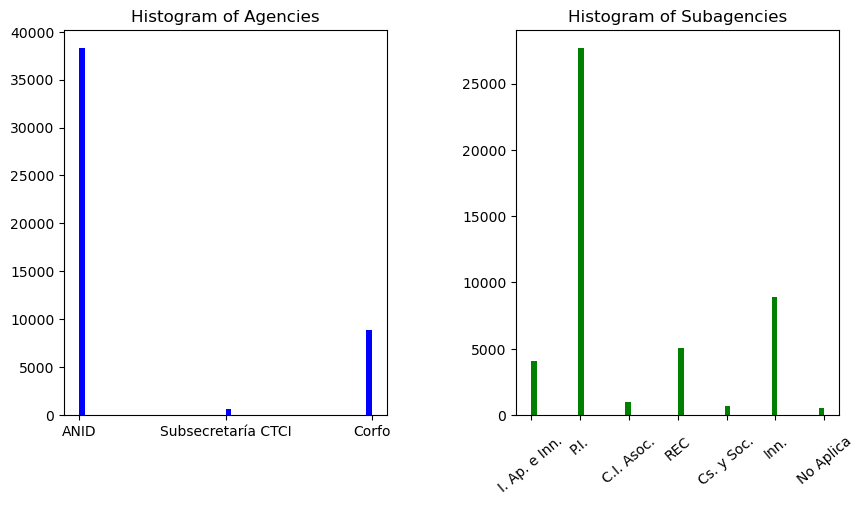

In [18]:
# Descriptive Analysis, Histogram - State agencies and sub-agencies


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create the State Agencies histogram in the left subplot
axs[0].hist(sf_data['Agencia'], bins=50, color='blue')
axs[0].set_title('Histogram of Agencies')

# Create a histogram in the right subplot
axs[1].hist(sf_data['subdireccion'], bins=50, color='green')
axs[1].set_title('Histogram of Subagencies')

# Rotate the xtick labels by 30 degrees and set labels
xticks = axs[1].get_xticks()
xticklabels = axs[1].get_xticklabels()
axs[1].set_xticks(xticks)
labels = ['I. Ap. e Inn.', 'P.I.', 'C.I. Asoc.', 'REC', 'Cs. y Soc.', 'Inn.', 'No Aplica']
axs[1].set_xticklabels(labels=labels, rotation=40)


# Adjust the spacing between the tick labels
axs[1].tick_params(axis='x', which='major', pad=10)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Save the figure as a PNG file
#fig.savefig('myfigure.png')

# Display the plot
plt.show()

In [19]:
# Covariance of Year and Amount granted.

# Drop NaN values

curated_data = sf_data[(sf_data['Monto'].notnull())]

y_ag_cov = np.cov(curated_data['Año'], curated_data['Monto'])
print(y_ag_cov)

# A positive covariance (2.43e+08) suggest that these variables are in direct relationship.
# As age increases, the amount granted grows.

[[9.27692689e+01 2.43238902e+08]
 [2.43238902e+08 1.13049593e+17]]


In [20]:
# Correlation of Year and Amount granted.

y_ag_corr, p = stats.pearsonr(curated_data['Año'], curated_data['Monto'])
print(y_ag_corr, p)

# Even though the correlation es positive, it's relatively near 0.
# This suggests that while the relation is positive, it's weak. 
# The p-value is very small, which suggests that this result is not due to chance: its statistically significative.

0.07510977602379174 6.947962495698141e-59
